<a href="https://colab.research.google.com/github/23eg106a49-ship/American-sign-language/blob/main/American_sign_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install split-folders

In [ ]:
pip install opendatasets

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import opendatasets as od
import splitfolders

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
od.download("https://www.kaggle.com/datasets/ayuraj/asl-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ramarapulalithsagar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ayuraj/asl-dataset


100%|██████████| 56.9M/56.9M [00:00<00:00, 1.35GB/s]

In [ ]:
# Path where our data is located
# base_path = "/content/asl-dataset/" # Updated path for Colab environment
base_path = "./asl-dataset/asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

filename  category
0     1/hand1_1_right_seg_5_cropped.jpeg         1
1       r/hand3_r_dif_seg_1_cropped.jpeg        27
2       t/hand1_t_bot_seg_4_cropped.jpeg        29
3       4/hand1_4_dif_seg_3_cropped.jpeg         4
4      u/hand2_u_left_seg_1_cropped.jpeg        30
...                                  ...       ...
2510    j/hand1_j_top_seg_1_cropped.jpeg        19
2511    c/hand4_c_bot_seg_5_cropped.jpeg        12
2512    r/hand2_r_bot_seg_5_cropped.jpeg        27
2513    0/hand1_0_top_seg_1_cropped.jpeg         0
2514    n/hand2_n_top_seg_2_cropped.jpeg        23

[2515 rows x 2 columns]

In [ ]:
print("number of elements = ", len(df))

number of elements =  2515


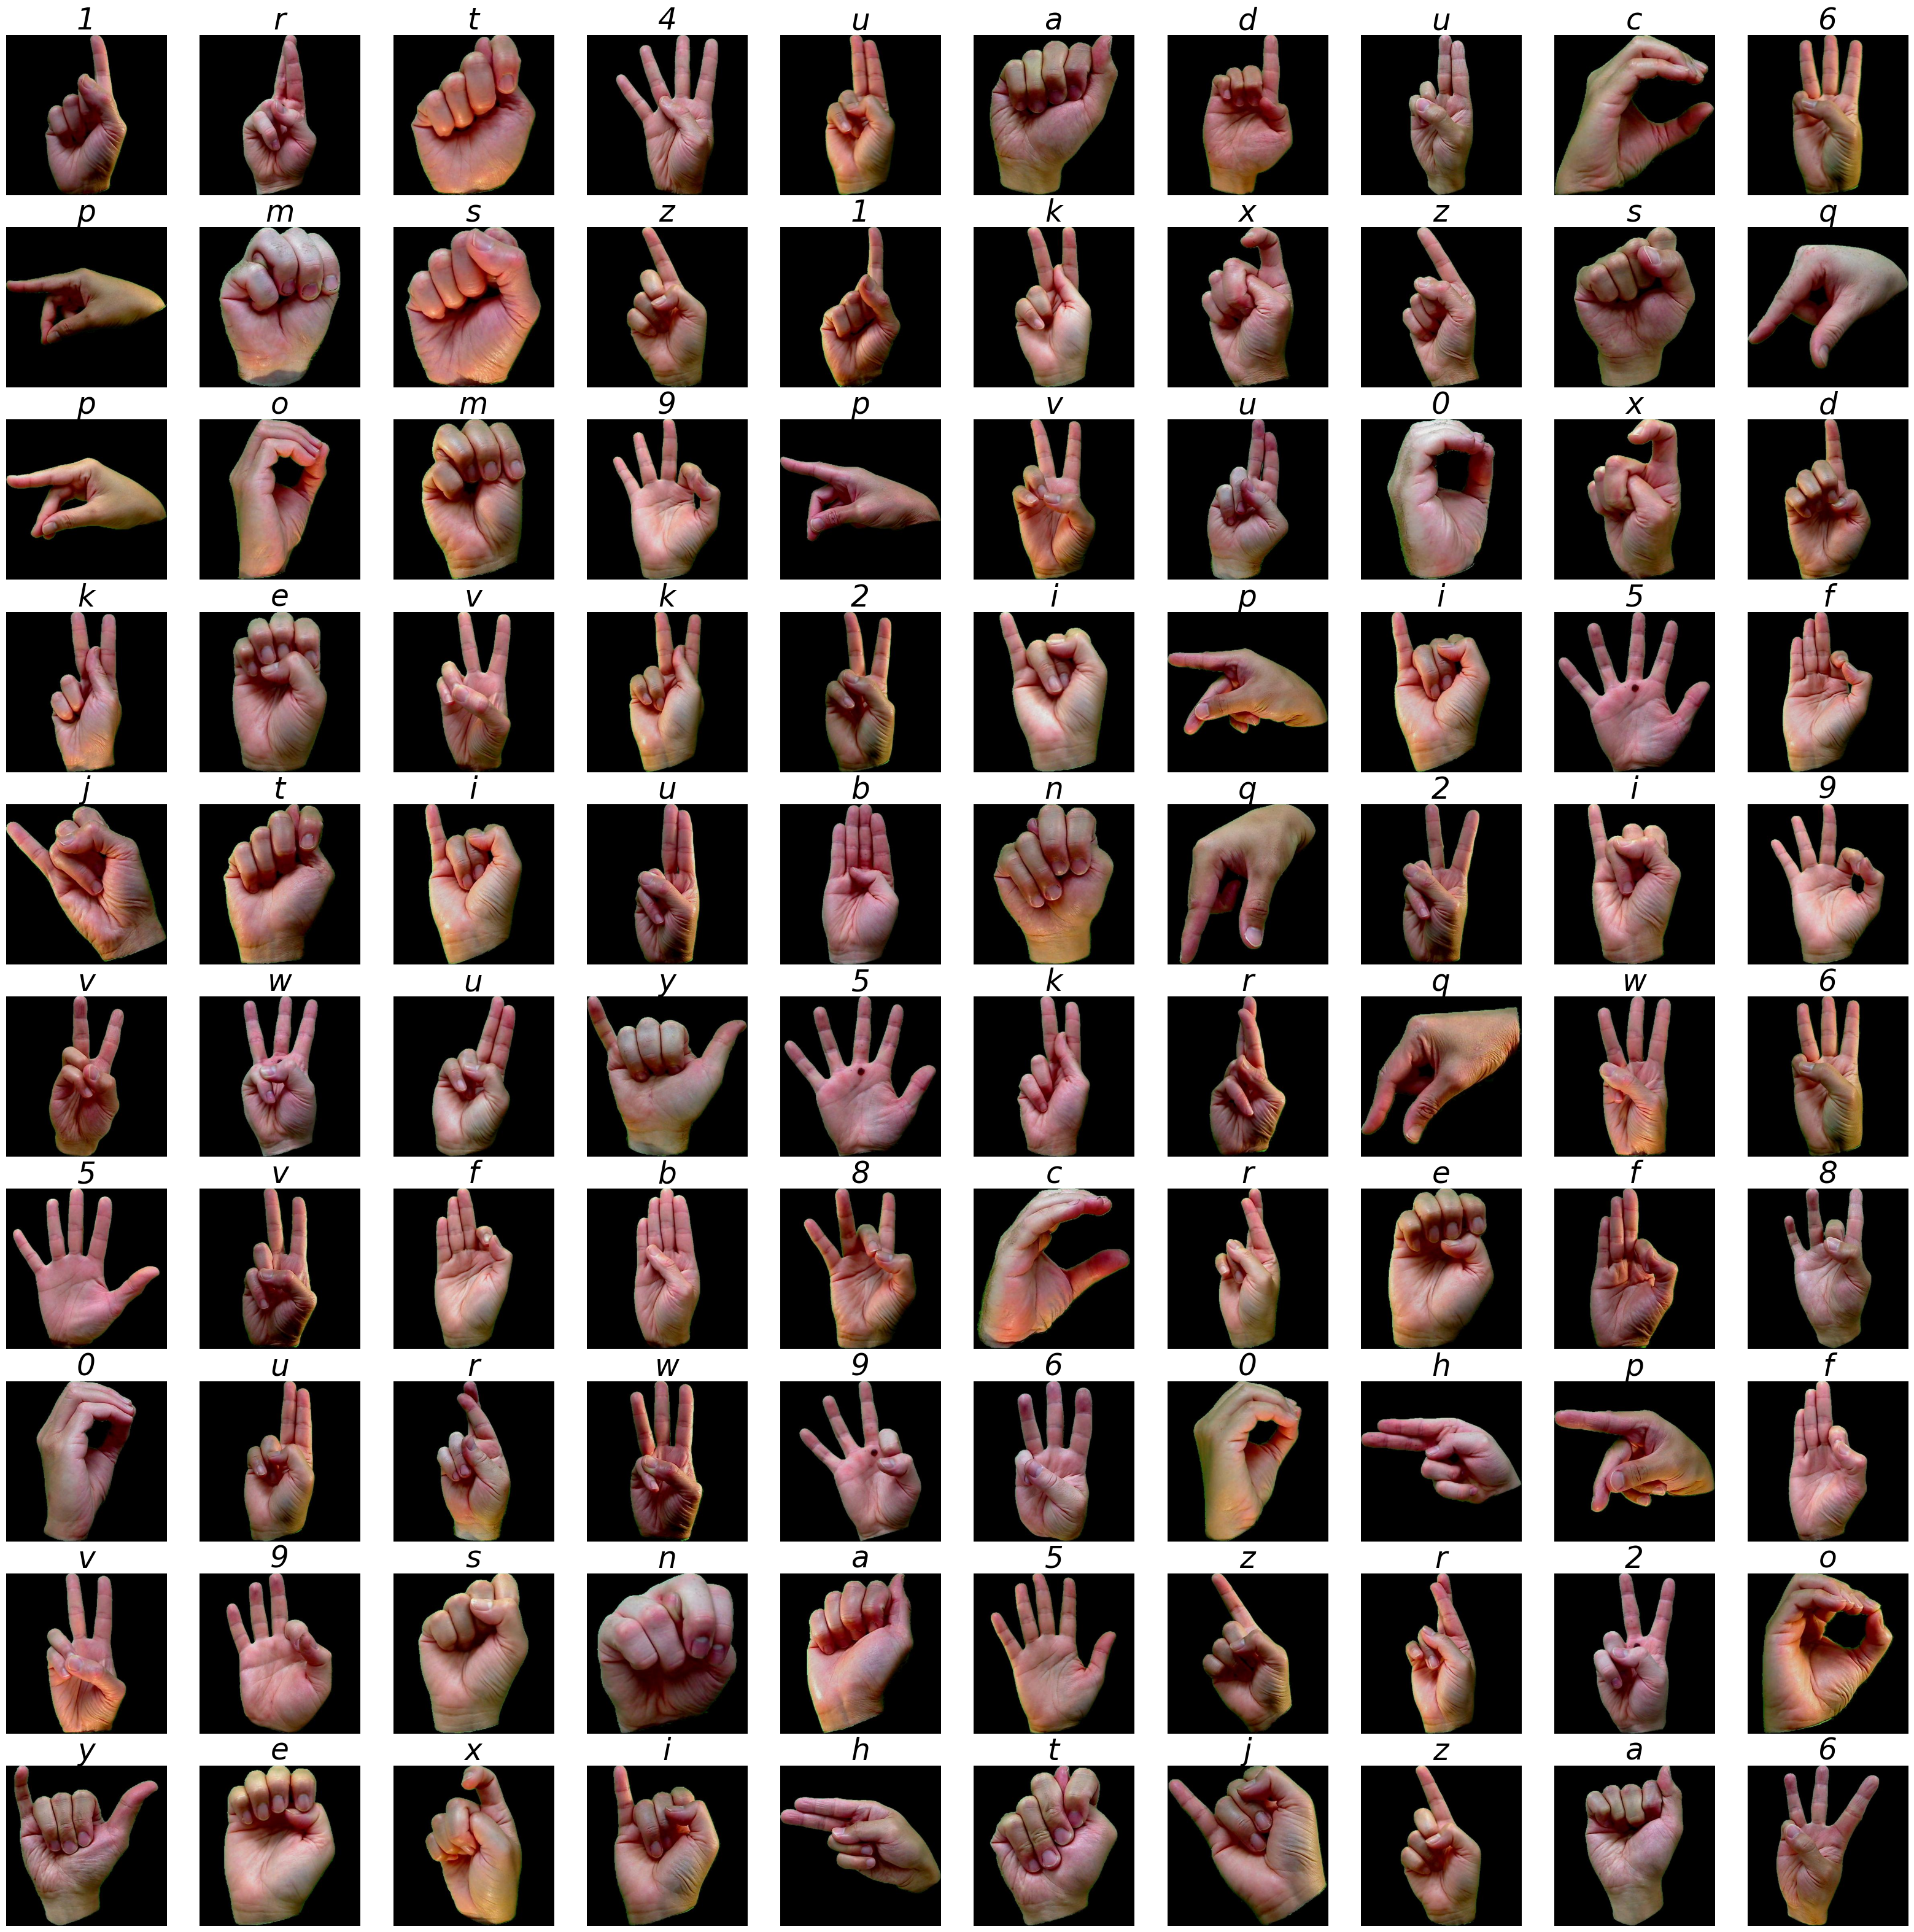

In [ ]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = base_path + df.filename[i]
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

/tmp/ipython-input-842432032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)


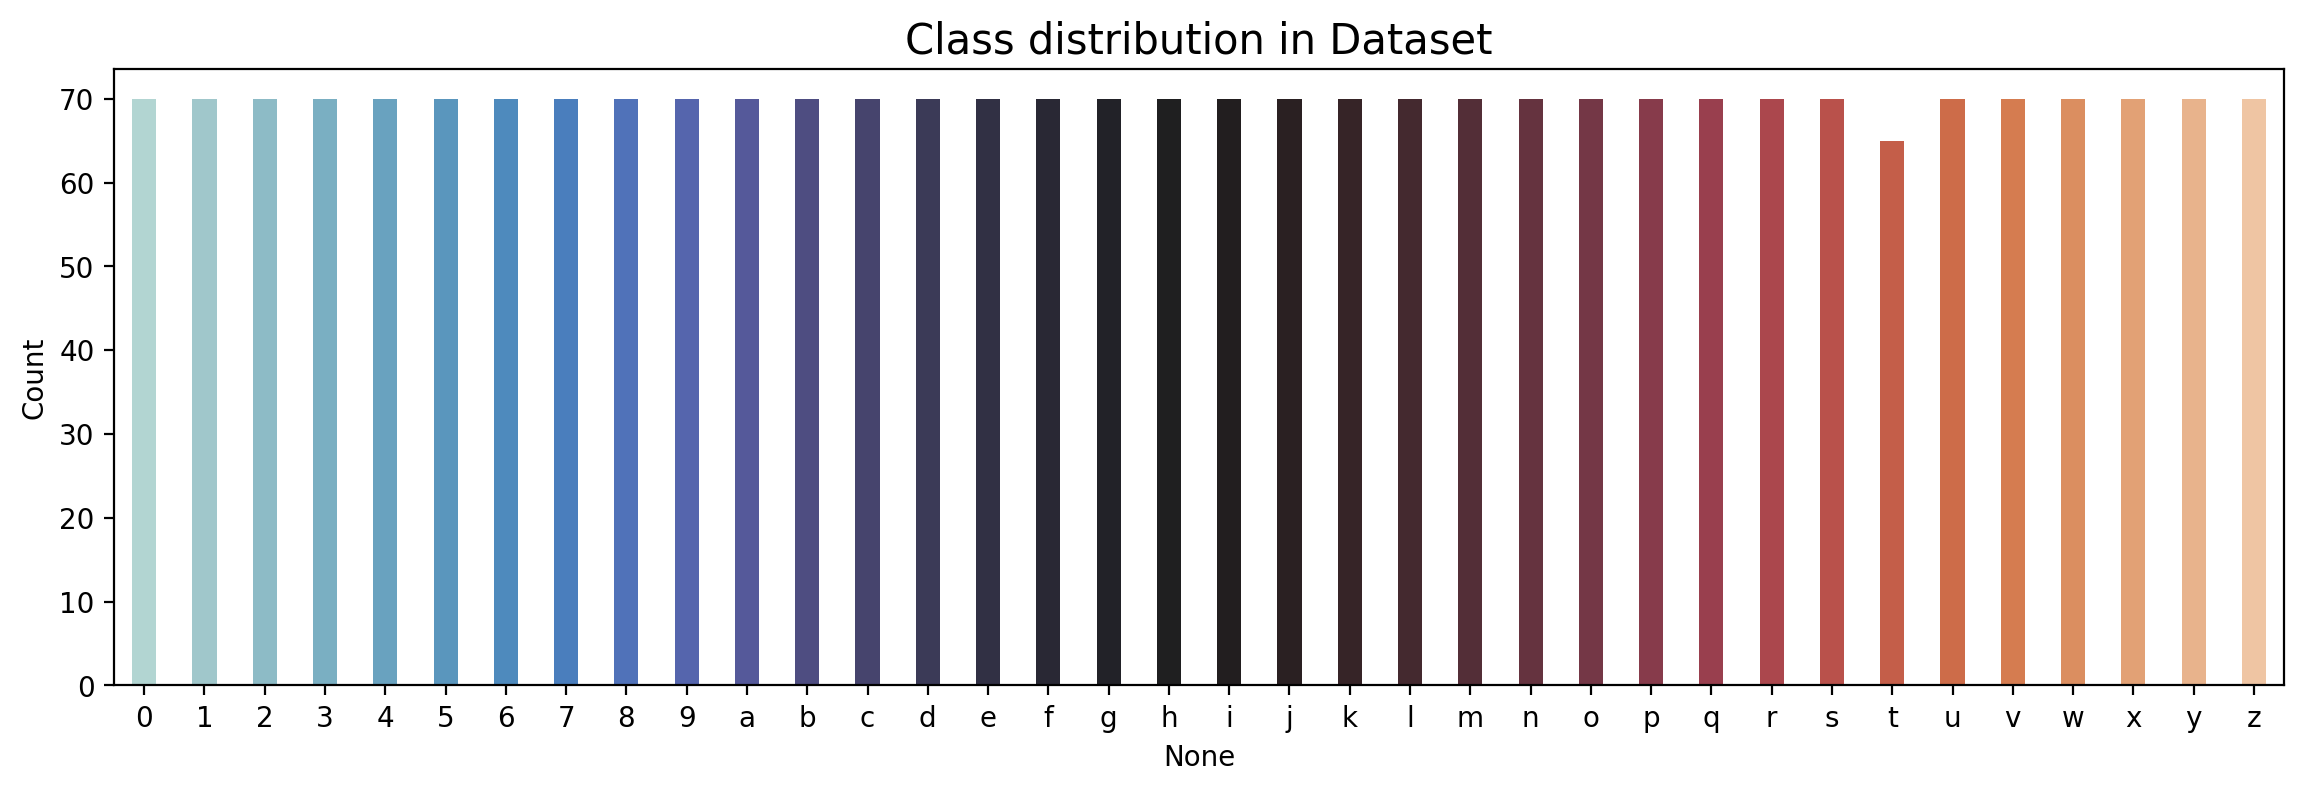

In [ ]:
label,count = np.unique(df.category,return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

In [ ]:
# Define the input and output directories for splitting
input_folder = base_path
output_folder = "./asl_dataset_split"

# Split the dataset into training, validation, and testing sets
# Ratio (train, validation, test)
splitfolders.ratio(input_folder, output=output_folder, seed=1333, ratio=(0.8,0.1,0.1))

print("Dataset split into training, validation, and testing sets.")

Copying files: 2515 files [00:01, 2482.05 files/s]

Dataset split into training, validation, and testing sets.


In [ ]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [ ]:
train_path = './asl_dataset_split/train'
val_path = './asl_dataset_split/val'
test_path = './asl_dataset_split/test'

batch = 32
image_size =224
img_channel = 3
n_classes = 36

In [ ]:
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         classes=list(categories.values()))

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical',
                                       classes=list(categories.values()))

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         classes=list(categories.values()),
                                         shuffle= False)

Found 2012 images belonging to 36 classes.
Found 251 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(image_size,image_size,3))
base_model.trainable = False  # không train lại backbone

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dense(36, activation="softmax")
])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,426,596 (9.26 MB)

 Trainable params: 168,612 (658.64 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
early_stoping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [36]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=30,
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.9761 - val_loss: 0.1082 - learning_rate: 1.5625e-05
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 1.0000 - loss: 0.0191 - val_accuracy: 0.9761 - val_loss: 0.1082 - learning_rate: 1.5625e-05
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0185
Epoch 3: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.9761 - val_loss: 0.1080 - learning_rate: 1.5625e-05
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 0.9761 - val_loss: 0.1082 - learning_rate: 7.8125e-06
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0188
Epoch 5: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
63/63 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 1.0000 - loss: 0.0188 - v

In [37]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 100.0
The Loss of the model for training data is: 0.0191646721214056
The accuracy of the model for validation data is: 97.60956168174744
The Loss of the model for validation data is: 0.10822492092847824


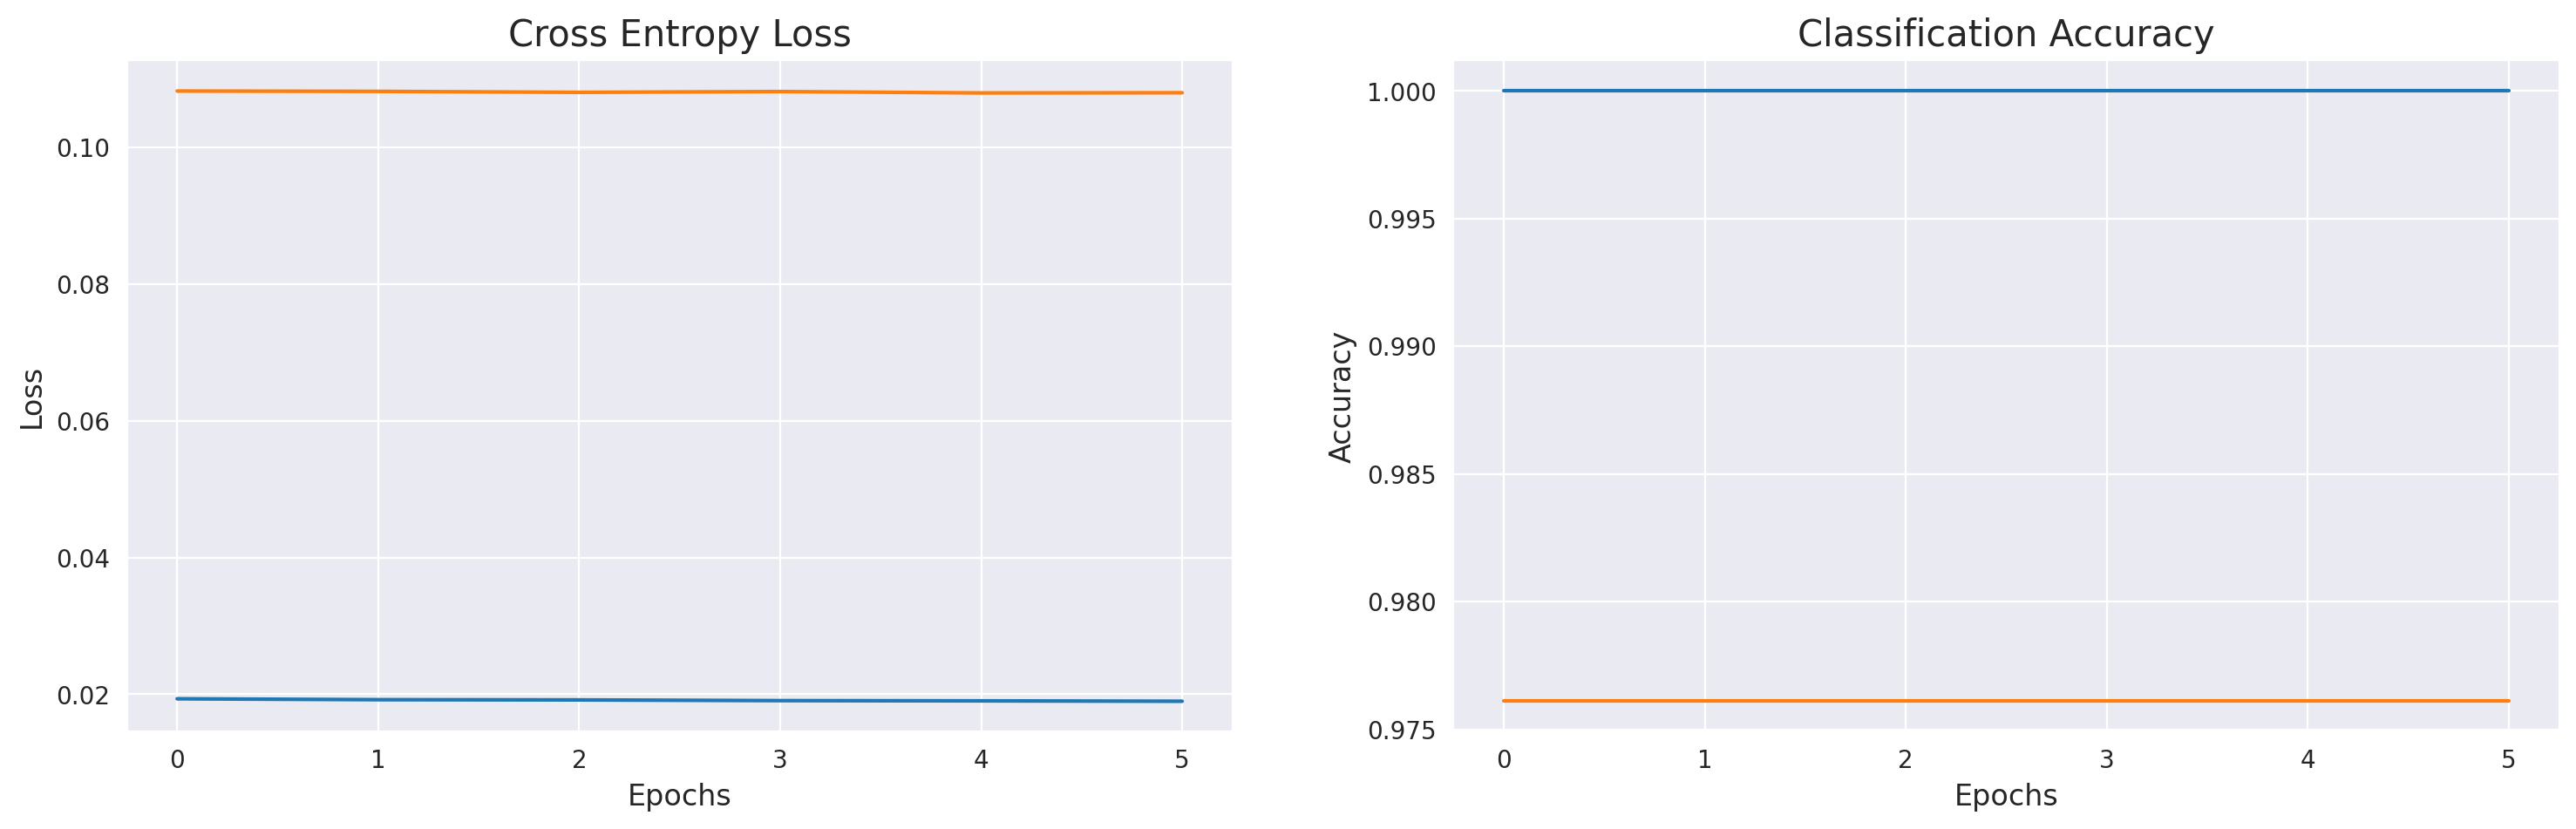

In [38]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [39]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


The accuracy of the model for testing data is: 94.44444179534912
The Loss of the model for testing data is: 0.18143250048160553


In [40]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 238
Incorrect predicted classes: 14


In [41]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.88      1.00      0.93         7
           2       0.86      0.86      0.86         7
           3       1.00      1.00      1.00         7
           4       0.88      1.00      0.93         7
           5       1.00      0.86      0.92         7
           6       0.67      0.86      0.75         7
           7       1.00      1.00      1.00         7
           8       0.88      1.00      0.93         7
           9       1.00      1.00      1.00         7
           a       1.00      0.86      0.92         7
           b       1.00      1.00      1.00         7
           c       1.00      1.00      1.00         7
           d       1.00      1.00      1.00         7
           e       1.00      1.00      1.00         7
           f       1.00      1.00      1.00         7
           g       1.00      1.00      1.00         7
           h       1.00    

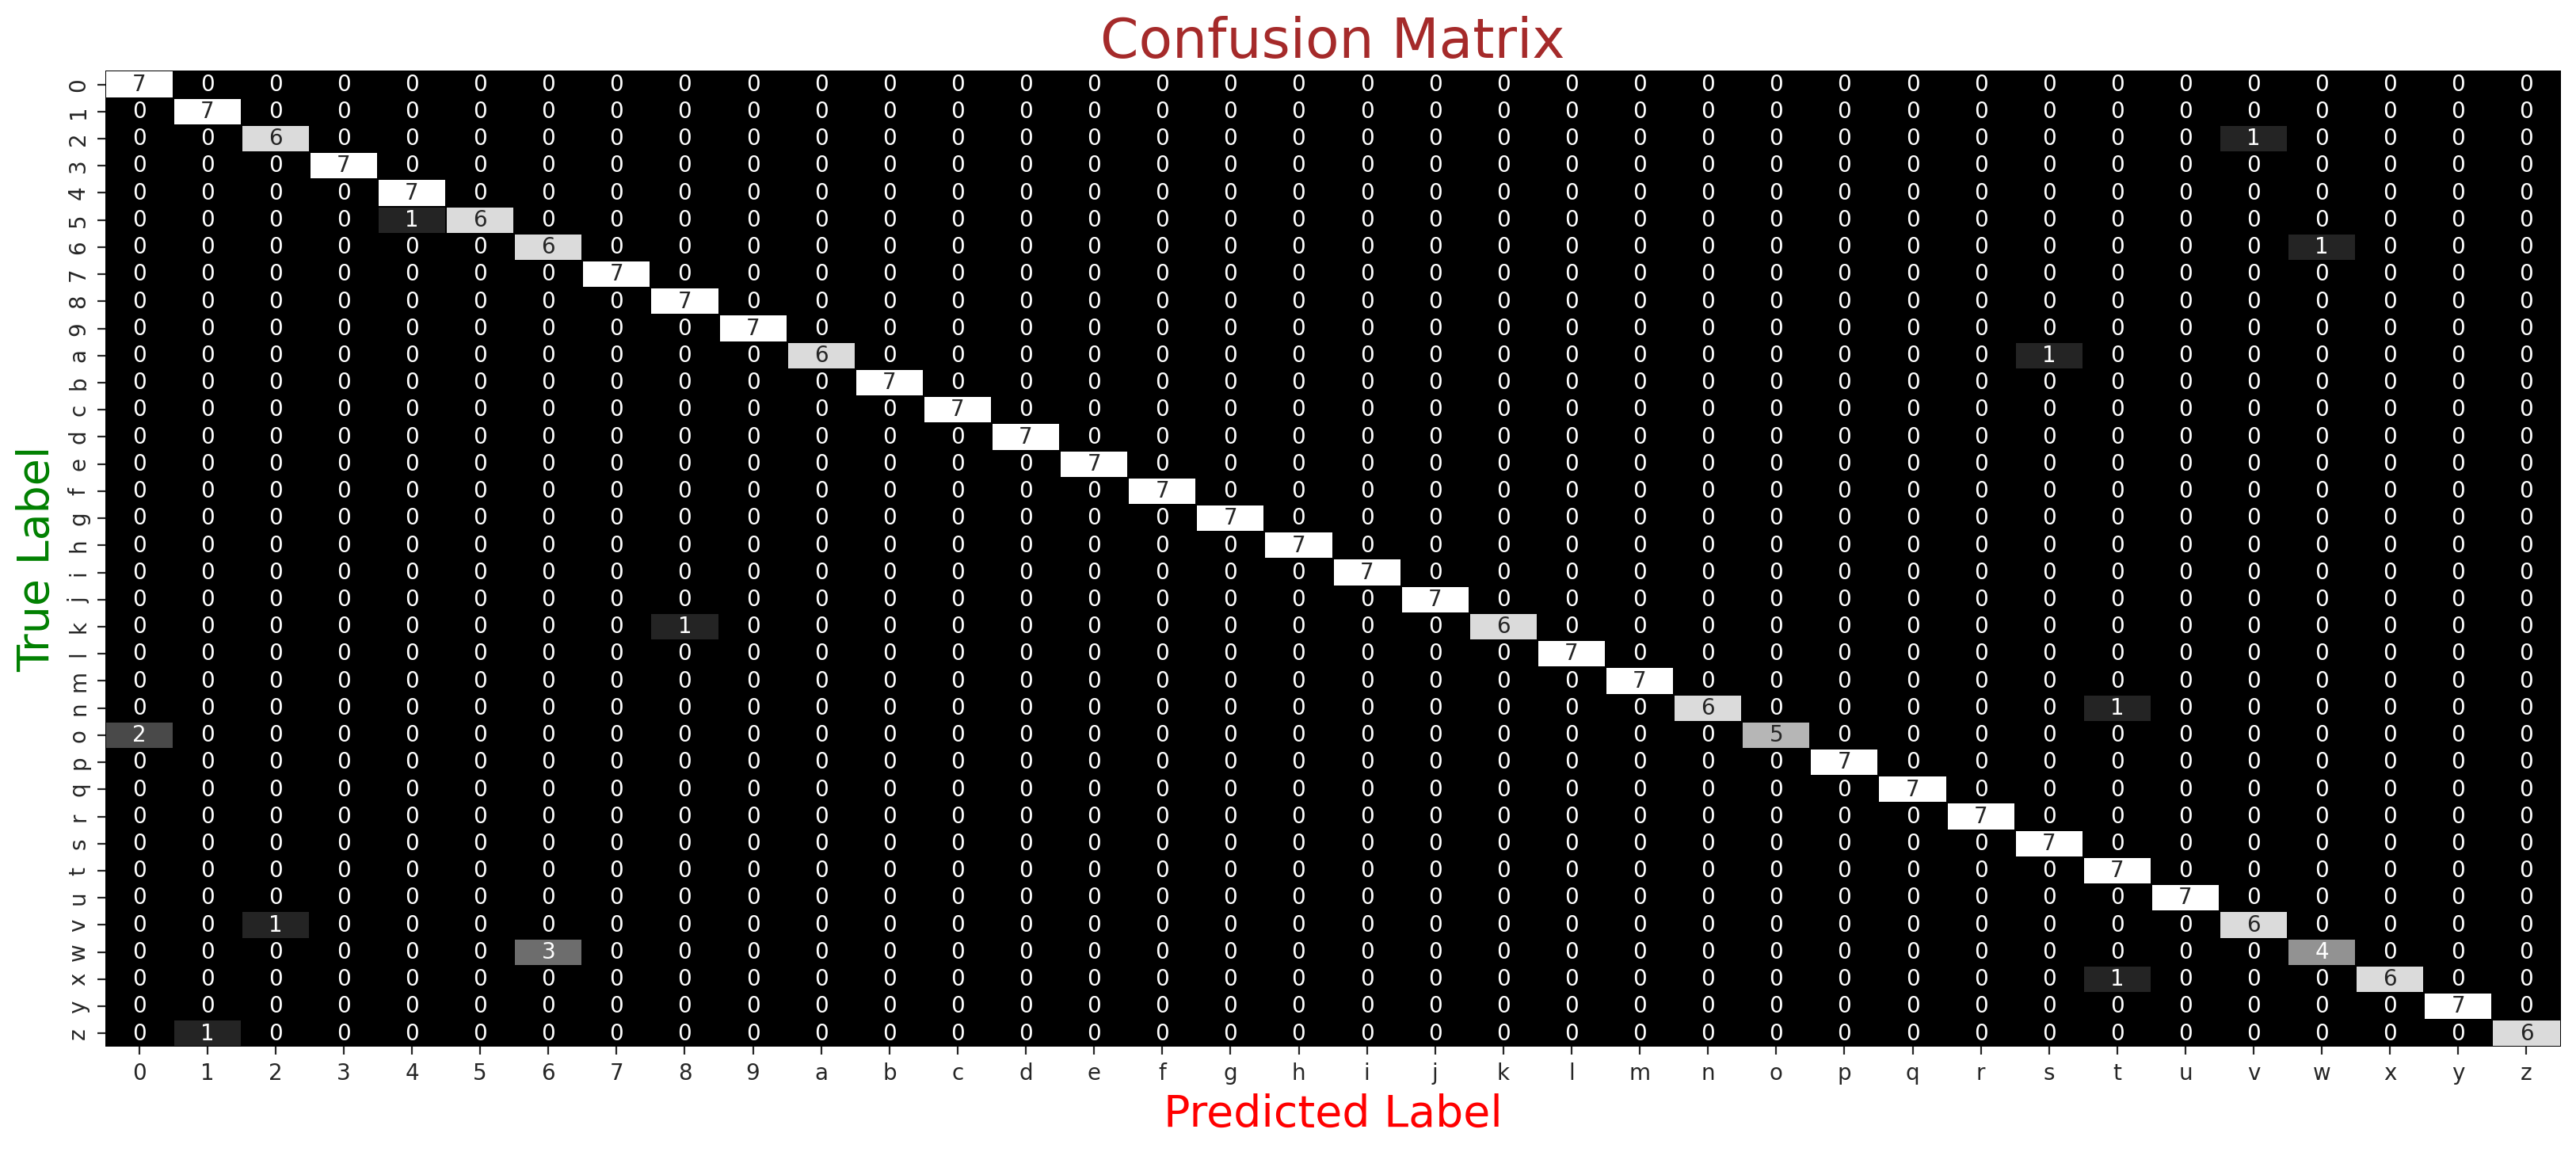

In [42]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.1, cmap = "gist_yarg_r",
            linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=categories.values(),
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()

In [43]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Data generators (có preprocess_input)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen   = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode="categorical")
val_ds   = val_gen.flow_from_directory(val_path, target_size=(224,224), batch_size=32, class_mode="categorical")
test_ds  = test_gen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode="categorical", shuffle=False)

# Model ResNet50
resnet_base = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
resnet_base.trainable = False  # Freeze backbone

resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dense(36, activation="softmax")
])

resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

resnet_model.summary()


Found 2012 images belonging to 37 classes.
Found 251 images belonging to 37 classes.
Found 252 images belonging to 37 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,854,628 (91.00 MB)

 Trainable params: 266,916 (1.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [44]:

resnet_base.trainable = True
for layer in resnet_base.layers[:-30]:
    layer.trainable = False


resnet_model.compile(optimizer=Adam(learning_rate=1e-5),
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

In [45]:
early_stoping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

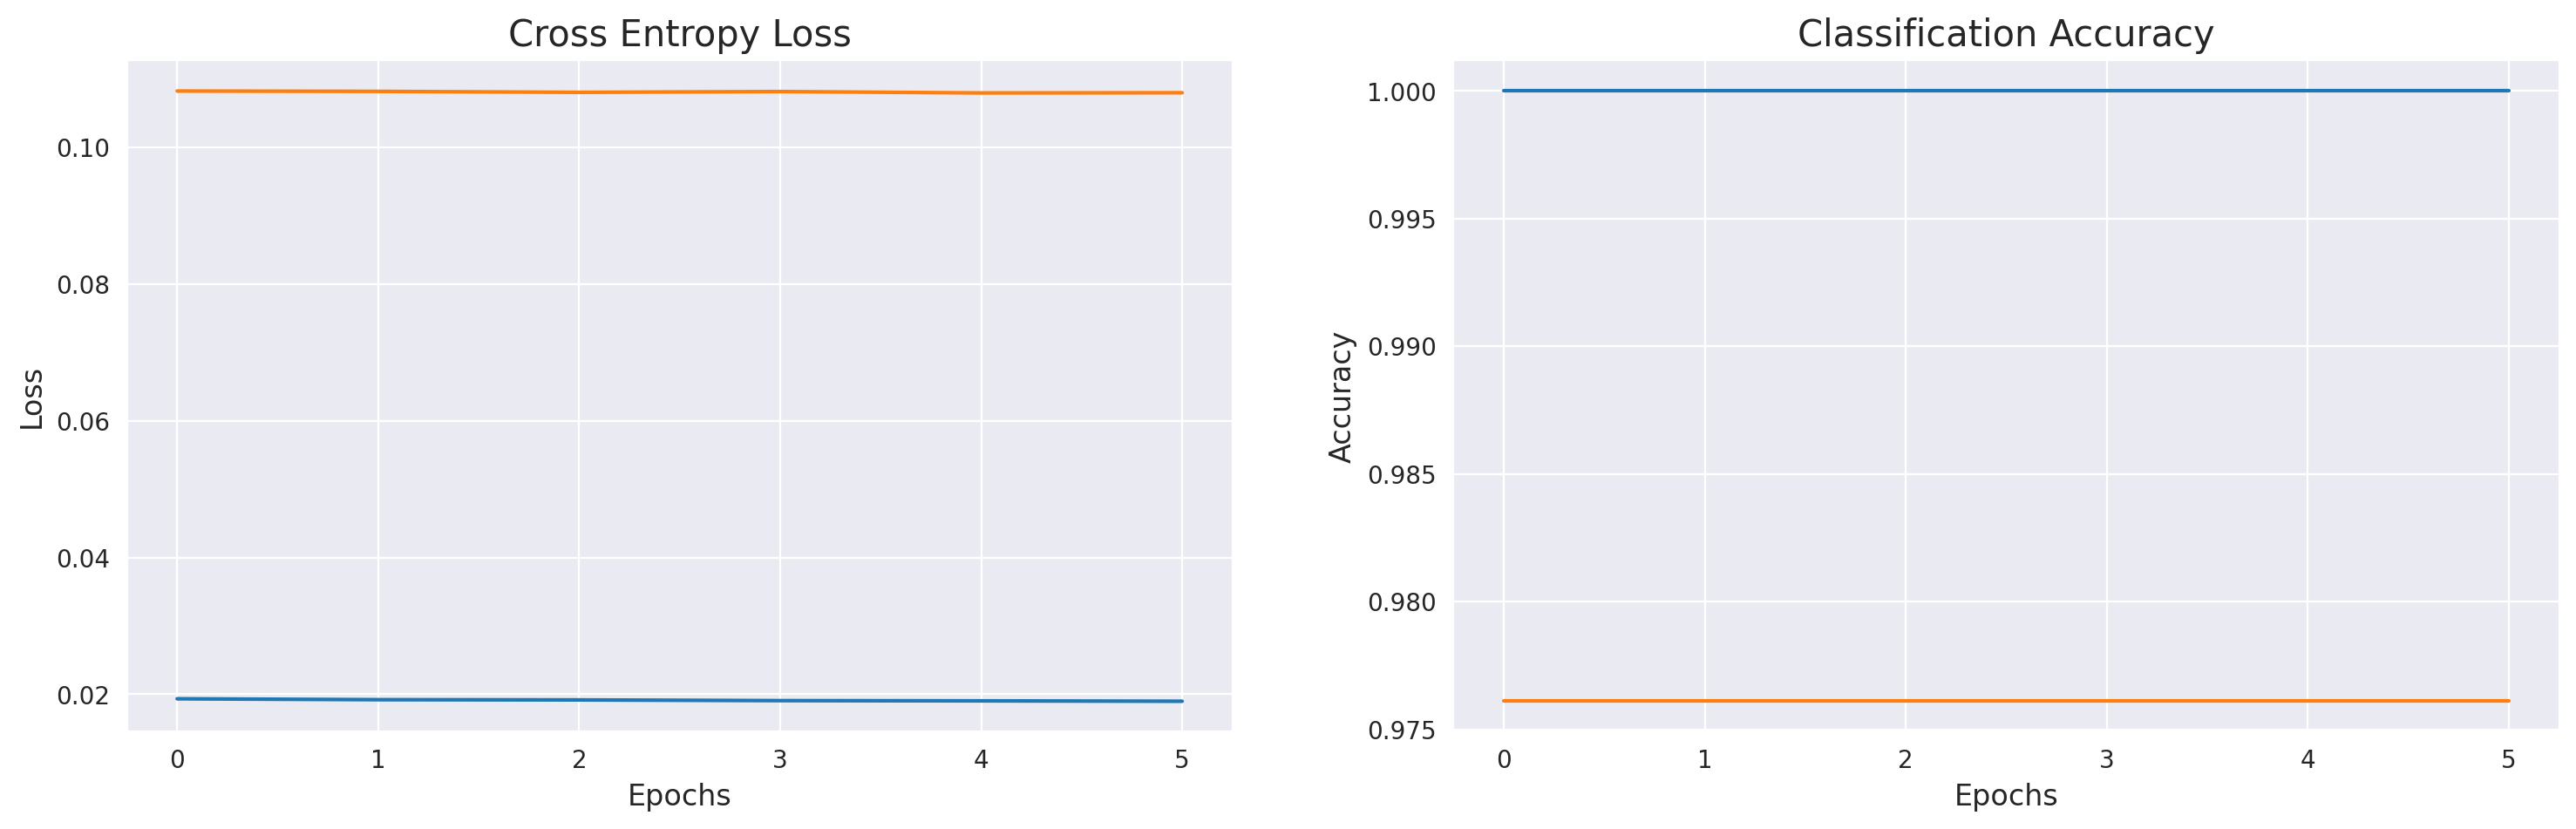

In [48]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()